In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [34]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9207
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1068 - accuracy: 0.9664
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9764


In [37]:
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)
print(validation_loss)
print(validation_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1037 - accuracy: 0.9670
0.10368958860635757
0.9670000076293945


In [38]:
model.save('digits_recognition_model')

INFO:tensorflow:Assets written to: digits_recognition_model/assets


In [39]:
copy_model = tf.keras.models.load_model('digits_recognition_model')

predictions = copy_model.predict([x_test])
predicted_value = np.argmax(predictions[0])
print(predicted_value)

313/313 [==============================] - 1s 2ms/step
7


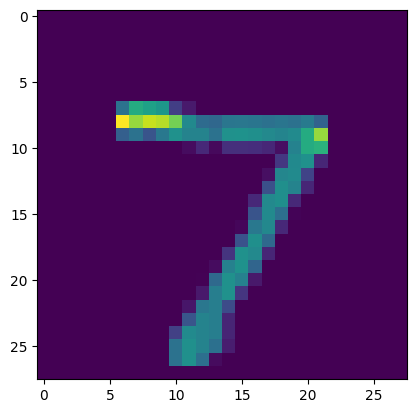

In [40]:
plt.imshow(x_test[0])